## Tensorflow

In [1]:
#pip install tensorflow

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [3]:
keras.Sequential()

<Sequential name=sequential, built=False>

In [4]:
df = sns.load_dataset('mpg').dropna()
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## API Sequential

In [5]:
help(keras.layers.Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |
 |  Just your regular densely-connected NN layer.
 |
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  F

In [6]:
help(keras.Model)

Help on class Model in module keras.src.models.model:

class Model(keras.src.backend.tensorflow.trainer.TensorFlowTrainer, keras.src.trainers.trainer.Trainer, keras.src.layers.layer.Layer)
 |  Model(*args, **kwargs)
 |
 |  A model grouping layers into an object with training/inference features.
 |
 |  There are three ways to instantiate a `Model`:
 |
 |  ## With the "Functional API"
 |
 |  You start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally, you create your model from inputs and outputs:
 |
 |  ```python
 |  inputs = keras.Input(shape=(37,))
 |  x = keras.layers.Dense(32, activation="relu")(inputs)
 |  outputs = keras.layers.Dense(5, activation="softmax")(x)
 |  model = keras.Model(inputs=inputs, outputs=outputs)
 |  ```
 |
 |  Note: Only dicts, lists, and tuples of input tensors are supported. Nested
 |  inputs are not supported (e.g. lists of list or dicts of dict).
 |
 |  A new Functional API model can also be created by using the
 

In [7]:
# 0. establecer semilla
import random
import numpy as np

keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# 1. Crear la arquitectura de la red neuronal
model = keras.Sequential([
    # Para este caso de uso Sequential pasando las capas como lista no es obligatorio especificar capa Input
    #keras.layers.Input(shape=(6,)), # aunque no lo pongamos, se van a detectar todas las columnas
    #keras.layers.Input(shape=(X.shape[1],)), # no es obligatorio en este caso
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1) # para regresion solo 1 neurona sin funcion activacion (funcion activacion lineal por defecto)
])

# 2. Compilar el modelo: especificar funciín coste, optimizador, métricas
model.compile(
    loss=keras.losses.MeanSquaredError(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.MeanAbsoluteError(), # MAE
        keras.metrics.RootMeanSquaredError(), # RMSE
        keras.metrics.MeanAbsolutePercentageError(), # MAPE
    ] 
)

In [8]:
# 3. Entrenamiento de la red neuronal
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 61512.8750 - mean_absolute_error: 213.9476 - mean_absolute_percentage_error: 1151.7104 - root_mean_squared_error: 242.5990 - val_loss: 9151.2080 - val_mean_absolute_error: 94.3738 - val_mean_absolute_percentage_error: 442.2468 - val_root_mean_squared_error: 95.6619
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13936.8086 - mean_absolute_error: 114.9703 - mean_absolute_percentage_error: 595.1465 - root_mean_squared_error: 117.8204 - val_loss: 3916.0833 - val_mean_absolute_error: 62.0055 - val_mean_absolute_percentage_error: 285.8053 - val_root_mean_squared_error: 62.5786
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2076.2952 - mean_absolute_error: 39.8282 - mean_absolute_percentage_error: 204.0685 - root_mean_squared_error: 44.6821 - val_loss: 3004.7114 - val_mean_absolute_error: 48.6304 - val_mean_absolute_percentage_error: 254.3333 - val_root_mean_squared_error: 54.8152
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,855 (34.59 KB)

 Trainable params: 2,951 (11.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,904 (23.07 KB)

Una vez entrenado, el modelo nos da estos valores


In [10]:
import pandas as pd
df_results = pd.DataFrame(model.history.history)
df_results.tail()
df_results.head(10)

,loss,mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error,val_loss,val_mean_absolute_error,val_mean_absolute_percentage_error,val_root_mean_squared_error
0,34521.824219,141.517471,759.262390,185.800491,9151.208008,94.373833,442.246765,95.661949
1,13590.763672,113.127525,579.208130,116.579430,3916.083252,62.005486,285.805328,62.578617
2,1572.044922,33.071724,174.846283,39.649021,3004.711426,48.630360,254.333328,54.815247
3,2858.085693,45.932480,257.505463,53.461067,199.252487,11.874064,62.524841,14.115683
4,519.720337,19.877642,93.207794,22.797375,984.740051,30.825459,135.641739,31.380568
5,443.883301,18.196609,85.692802,21.068539,161.050552,10.960402,55.859928,12.690570
6,289.063171,13.728535,78.293060,17.001858,151.854538,10.705121,53.938873,12.322927
7,135.715271,9.750001,44.115490,11.649690,215.616180,12.278196,46.419815,14.683875
8,124.483498,9.146066,38.648903,11.157217,118.184479,9.330520,42.372528,10.871268
9,113.515900,8.653651,43.446579,10.654384,116.402748,9.184105,40.213104,10.789011


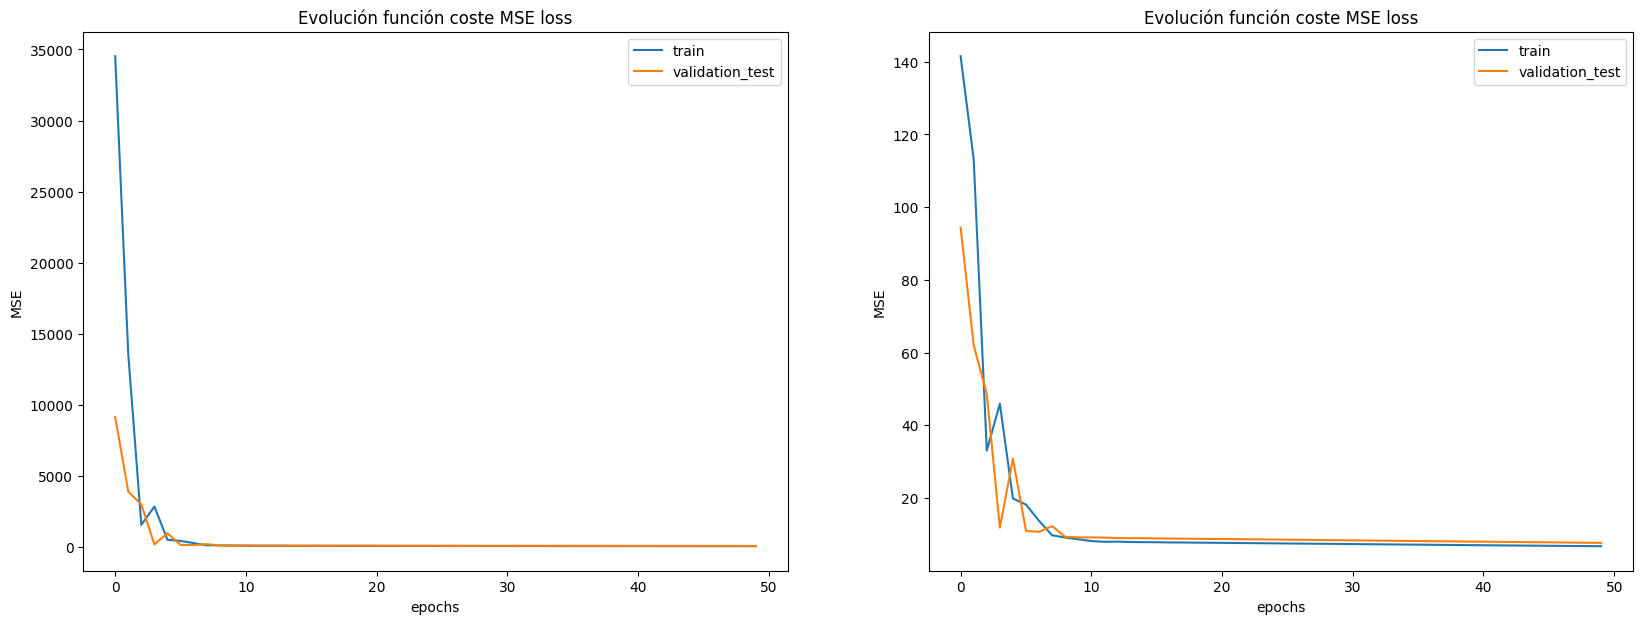

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(df_results['loss'], label='train')
plt.plot(df_results['val_loss'], label='validation_test')
plt.title('Evolución función coste MSE loss')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_results['mean_absolute_error'], label='train')
plt.plot(df_results['val_mean_absolute_error'], label='validation_test')
plt.title('Evolución función coste MSE loss')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()

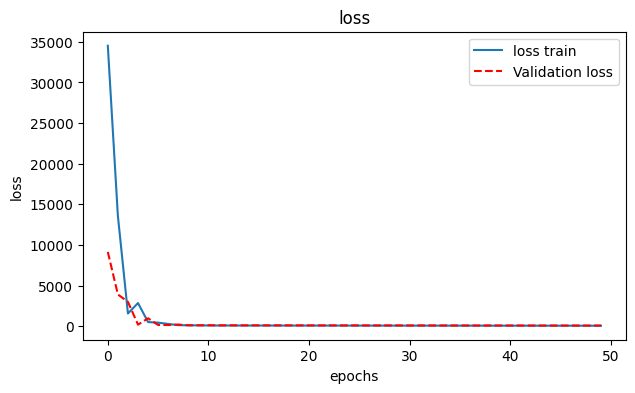

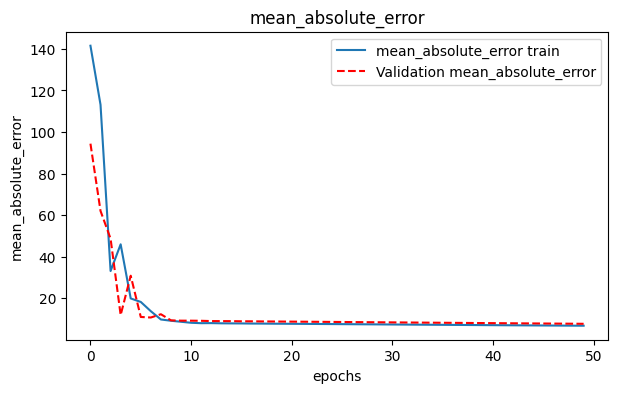

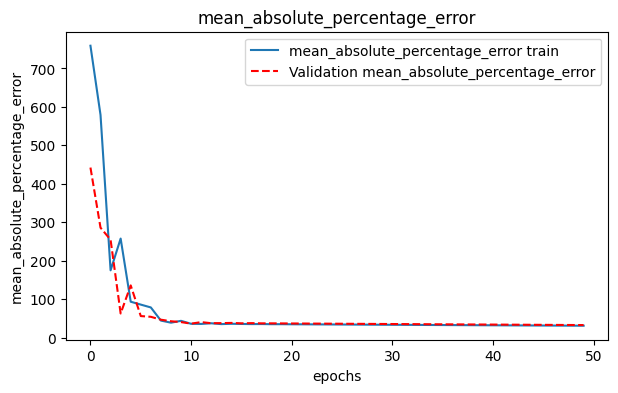

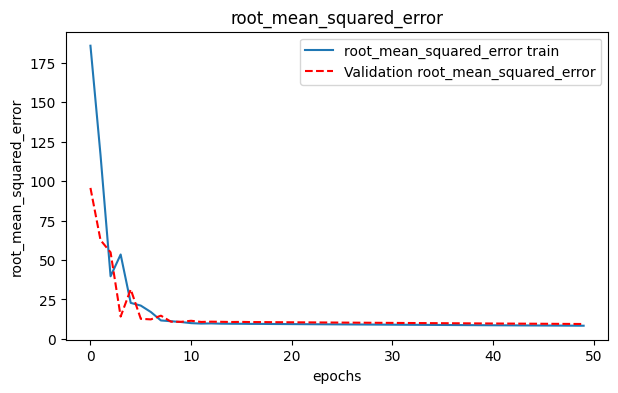

In [12]:
def plot_history(df_history):
    '''
    Dado un dataframe con el history de entrenamiento de una red (model.history.history)
    genera gráficas de todas las métricas disponibles. Muestra un gráfico por cada par de métricas ejemplo:
    * loss y val_loss
    * mean_absolute_error y val_mean_absolute_error
    ''' 
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 4))
        plt.plot(df_history[metric], label=(f'{metric} train'))
        
        val_metric = f'val_{metric}'
        #has_val_metric = val_metric in df_history.columns
        #if has_val_metric:
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'Validation {metric}', linestyle='dashed', color='red')

        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()            

plot_history(df_results)   

In [13]:
model.evaluate(X_test, y_test, verbose=1)






3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 57.3179 - mean_absolute_error: 6.0434 - mean_absolute_percentage_error: 27.7001 - root_mean_squared_error: 7.5653 


[57.296905517578125, 5.9765167236328125, 7.569471836090088, 27.86292266845703]

In [14]:
model.predict(X_test)[:5] # 2D

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[24.259947],
       [24.191603],
       [20.074736],
       [20.825842],
       [27.597914]], dtype=float32)

In [15]:
y_pred = model.predict(X_test).ravel() # 1D
y_pred[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([24.259947, 24.191603, 20.074736, 20.825842, 27.597914, 22.691847,
       19.198545, 24.904997, 24.438192, 25.482908], dtype=float32)

In [16]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

print('mae test', mean_absolute_error(y_test, y_pred))
print('rmse test', root_mean_squared_error(y_test, y_pred))
print('mape test', mean_absolute_percentage_error(y_test, y_pred))


mae test 5.9765166137791885
rmse test 7.569472028749313
mape test 0.2786292202327745


In [17]:
df_comparison = pd.DataFrame({'real': y_test, 'prediccion': y_pred, 'residuo':y_test - y_pred})
df_comparison.head()

,real,prediccion,residuo
79,26.0,24.259947,1.740053
276,21.6,24.191603,-2.591603
248,36.1,20.074736,16.025264
56,26.0,20.825842,5.174158
393,27.0,27.597914,-0.597914


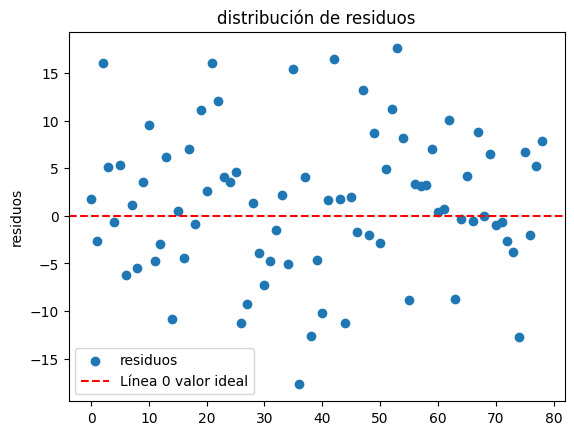

In [18]:
plt.scatter(range(len(df_comparison)), df_comparison['residuo'], label='residuos')
plt.axhline(y=0, color='r', linestyle='dashed', label='Línea 0 valor ideal')
plt.ylabel('residuos')
plt.title('distribución de residuos')
plt.legend();

## Guardar el modelo

In [19]:
model.save('modelo_entrenado.keras')

In [20]:
# importar modelo
modelo_cargado = keras.models.load_model('modelo_entrenado.keras')

In [21]:
modelo_cargado.predict(X_test).ravel()[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([24.259947, 24.191603, 20.074736, 20.825842, 27.597914, 22.691847,
       19.198545, 24.904997, 24.438192, 25.482908], dtype=float32)

In [22]:
config = model.to_json()
config

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 6], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 50, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": 

In [23]:
new_model = keras.models.model_from_json(config)
new_model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 6),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 50,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer

In [24]:
model.save_weights('pesos_modelo.weights.h5')

In [25]:
new_model.load_weights('pesos_modelo.weights.h5')
new_model.compile(
    loss=keras.losses.MeanSquaredError(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.MeanAbsoluteError(), # MAE
        keras.metrics.RootMeanSquaredError(), # RMSE
        keras.metrics.MeanAbsolutePercentageError() # MAPE
    ]
)
new_model.predict(X_test).ravel()[:10]

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001ADE1B66AC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([24.259947, 24.191603, 20.074736, 20.825842, 27.597914, 22.691847,
       19.198545, 24.904997, 24.438192, 25.482908], dtype=float32)

## API

In [29]:
# 0. opcional: establecer semilla para reproducibilidad
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# 1. Crear arquitectura_
input_layer = keras.layers.Input(shape=(X.shape[1], )) # la coma es para que nos genere una tupla
dense_layer_1 = keras.layers.Dense(64, activation='relu')(input_layer) # relu porque es una capa intermedia
dense_layer_2 = keras.layers.Dense(32, activation='relu')(dense_layer_1)
output_layer = keras.layers.Dense(1)(dense_layer_2)
model = keras.models.Model(inputs=input_layer, outputs=output_layer, name='regresion_nn')

# 2. Compilar modelo
model.compile(
    loss=keras.losses.MeanSquaredError(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.MeanAbsoluteError(), # MAE
        keras.metrics.RootMeanSquaredError(), # RMSE
        keras.metrics.MeanAbsolutePercentageError() # MAPE
    ]
)

# 3. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8215.0918 - mean_absolute_error: 77.3132 - mean_absolute_percentage_error: 405.7786 - root_mean_squared_error: 88.1674 - val_loss: 3706.8071 - val_mean_absolute_error: 55.7603 - val_mean_absolute_percentage_error: 284.8530 - val_root_mean_squared_error: 60.8836
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2923.6392 - mean_absolute_error: 46.7161 - mean_absolute_percentage_error: 257.0688 - root_mean_squared_error: 53.2767 - val_loss: 1046.8384 - val_mean_absolute_error: 31.9448 - val_mean_absolute_percentage_error: 142.6514 - val_root_mean_squared_error: 32.3549
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1206.9982 - mean_absolute_error: 33.6789 - mean_absolute_percentage_error: 167.4749 - root_mean_squared_error: 34.6696 - val_loss: 96.2049 - val_mean_absolute_error: 8.0469 - val_mean_absolute_percentage_error: 32.8291 - val_root_mean_squared_error: 9.8084
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

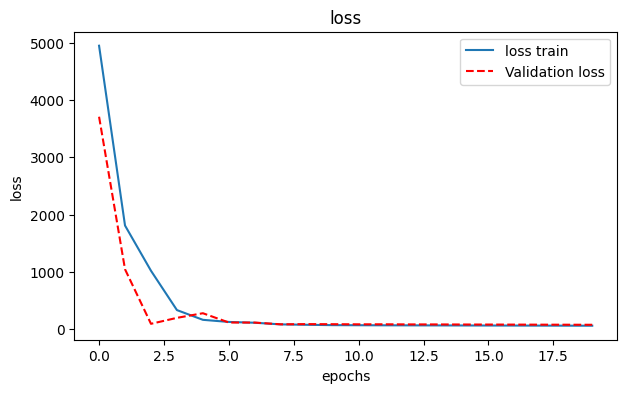

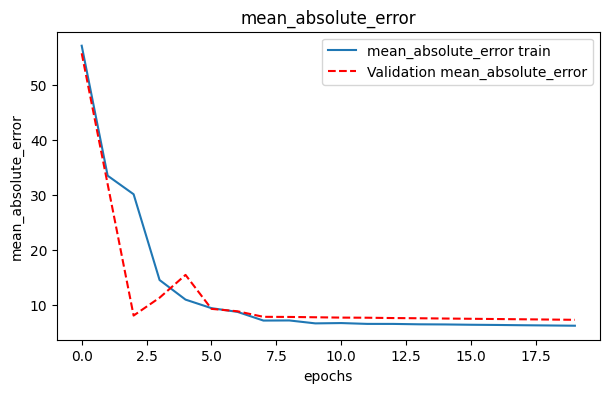

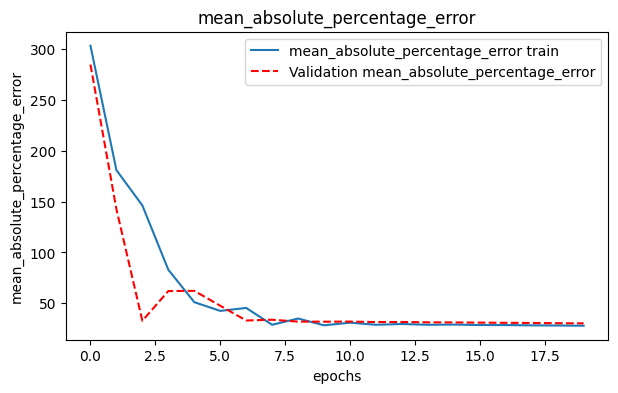

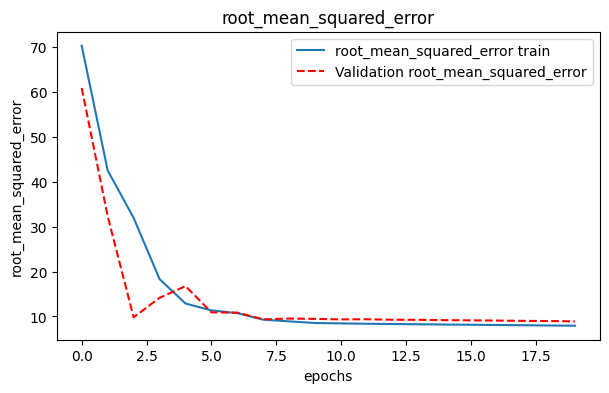

In [30]:
df_history = pd.DataFrame(model.history.history)
plot_history(df_history)